<a href="https://colab.research.google.com/github/TanChen168/Project2/blob/main/Project2_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Definitions

Frequent consumption of high caloric food (FAVC)
Frequency of consumption of vegetables (FCVC)
Number of main meals (NCP)
Consumption of food between meals (CAEC)
Consumption of water daily (CH20)
Consumption of alcohol (CALC)
Calories consumption monitoring (SCC)
Physical activity frequency (FAF)
Time using technology devices (TUE)
Transportation used (MTRANS)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
filename = '/content/sample_data/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(filename)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [ ]:
# Format nominal Data (y/n and f/m), others will be handled by OHE

df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['SMOKE'] = df['SMOKE'].replace({'yes': 1, 'no': 0})
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes': 1, 'no': 0})
df['FAVC'] = df['FAVC'].replace({'yes': 1, 'no': 0})
df['SCC'] = df['SCC'].replace({'yes': 1, 'no': 0})


In [ ]:
df['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [ ]:
# Perform Test-Train-Split
X = df.drop(columns = ['NObeyesdad'])
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Create categorical and numeric selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
# Object initialization
median_imputer = SimpleImputer(strategy = 'median')
freq_imputer = SimpleImputer(strategy = 'most_frequent')
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Create pipeline for numeric columns
num_pipe = make_pipeline(median_imputer, scaler)

# Create pipeline for categorical columns
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

# Create column transformers
column_transformer = make_column_transformer(num_tuple, cat_tuple)
column_transformer.fit(X_train)

# Transform train and test set
X_train_processed = column_transformer.transform(X_train)
X_test_processed = column_transformer.transform(X_test)

In [ ]:
X_train_processed

array([[ 1.0159195 ,  0.69290662, -0.01971309, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.0159195 ,  1.68144193, -0.41494799, ...,  0.        ,
         0.        ,  0.        ],
       [-0.98432996,  0.18461464,  1.57337702, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.0159195 , -0.22420698, -0.55639619, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.0159195 , -0.22265179, -0.7907335 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.98432996, -0.68213169,  1.24127752, ...,  0.        ,
         1.        ,  0.        ]])

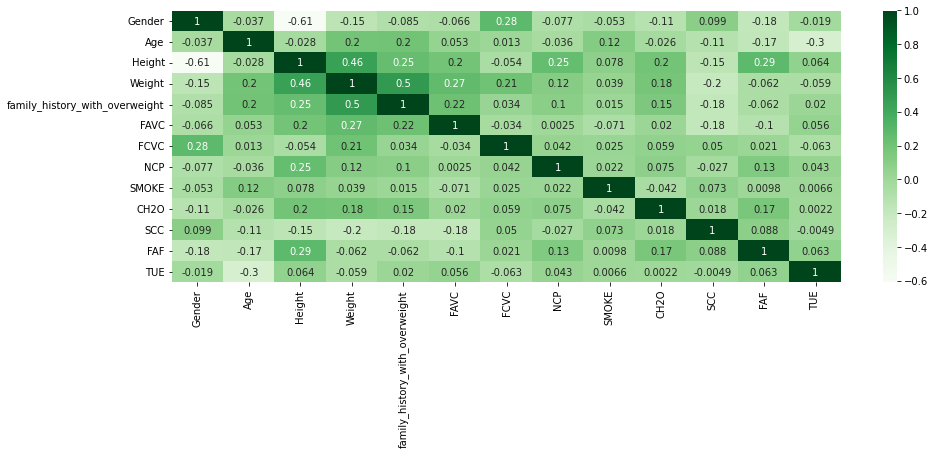

In [ ]:
# Create correlation heatmap
fig, ax = plt.subplots(figsize=(15, 5))
corr = X_train.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

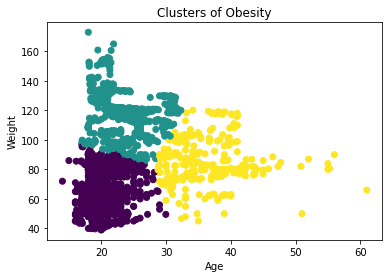

In [ ]:
# Create a univariate visuals for the features
df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6})
df_x = df[['Age', 'Weight']]

# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data.
scaled_df = scaler.fit_transform(df_x)

# Visualize the clusters

kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)

df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['Age'], df['Weight'], c = df['cluster'])
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Clusters of Obesity');

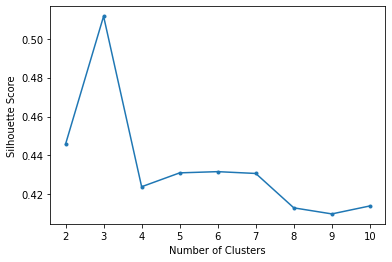

In [ ]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');
